In [1]:
import sys
path = '/Users/Everwitt/Documents/Pitch-Prediction/pitcherprediction'
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np

#importing path to obvious_zones allows us to import
from obvious_zones import *

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#these values are actually based on the universal strike zone values
RIGHT = 0.831
TOP = 1.074
obv_zones = ObviousZones(RIGHT, TOP)

In [4]:
print(obv_zones)

Cutoff Coordinates= > left_x: -0.831, right_x: 0.831top_y: 1.074, bot_y: -1.074


In [5]:
p = pd.read_csv('./obv_zone_cutoff.csv')

In [6]:
p['obv_zone'].value_counts()

12b    420117
15b    416363
13b    389123
16b    179081
10b    140269
14b     94646
9b      47673
11b     24377
Name: obv_zone, dtype: int64

In [7]:
p['pitch_type'].value_counts()

FF    560352
FT    335452
SL    322500
CH    225681
CU    168828
FC     98836
Name: pitch_type, dtype: int64

In [8]:
p.shape

(1711649, 16)

In [9]:
#For Each Pitch
ff = p.loc[p['pitch_type'] == 'FF']
ft = p.loc[p['pitch_type'] == 'FT']
fc = p.loc[p['pitch_type'] == 'FC']
sl = p.loc[p['pitch_type'] == 'SL']
ch = p.loc[p['pitch_type'] == 'CH']
cu = p.loc[p['pitch_type'] == 'CU']
#For Each Zone
#Swing/Take % -> We want like a heat map of sorts that is based on this pct

In [10]:
filt = ff['obv_zone'] == '9b'
z = ff.loc[filt, ['px', 'py', 'swing']]

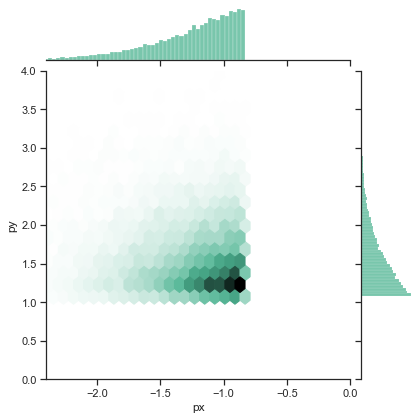

In [11]:
#px, py hexbin for all pitches in obvious zone 9b
sns.set_theme(style="ticks")
plot = sns.jointplot(x=z['px'], y=z['py'], kind="hex", color="#4CB391")

xs = .6
ys = 1

plot.ax_marg_x.set_xlim(-4*xs, 0)
plot.ax_marg_y.set_ylim(0, 4)

plt.show()

In [12]:
#from original cleaning kaggle
x_arb = -1.2
y_arb = 1.4

#inside that square what is the %swing/take?
filt = ((z['py'] < y_arb) & (z['px'] > x_arb))
zf = z.loc[filt]
znf = z.loc[~filt]

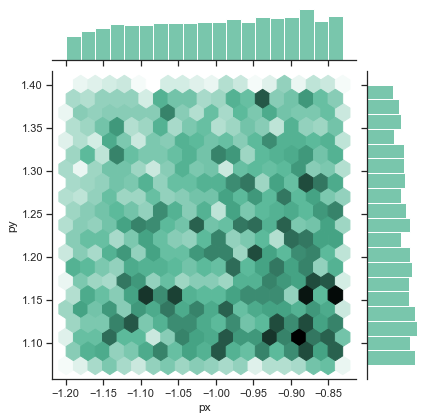

In [13]:
#px, py density of pitches inside our old 9b cutoff
sns.set_theme(style="ticks")
plot = sns.jointplot(x=zf['px'], y=zf['py'], kind="hex", color="#4CB391")
plt.show()

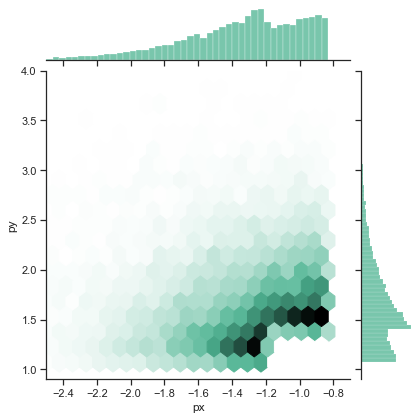

In [14]:
#px, py density of pitches outside our old 9b cutof
sns.set_theme(style="ticks")
plot = sns.jointplot(x=znf['px'], y=znf['py'], kind="hex", color="#4CB391")
plot.ax_marg_x.set_xlim(-2.5, -.7)
plot.ax_marg_y.set_ylim(.9, 4)
plt.show()

## Creating Visualizations and Summaries of Swing/Take Percentages

In [15]:
def disp_9(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):
    
    filt = dfp['obv_zone'] == '9b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(-0.831, -1.8, num_points)
    y = np.linspace(1.074, 2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 9B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 9B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [16]:
def disp_10(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):

    filt = dfp['obv_zone'] == '10b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(-0.831, 0.829, num_points)
    y = np.linspace(1.074, 2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 10B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 10B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [17]:
def disp_11(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):
    
    filt = dfp['obv_zone'] == '11b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(0.831, 1.8, num_points)
    y = np.linspace(1.074, 2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 11B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 11B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [18]:
def disp_12(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):

    filt = dfp['obv_zone'] == '12b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(-0.831, -1.8, num_points)
    y = np.linspace(-1.074, 1.073, num_points) #FIX
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx)
                pitches = dfz.loc[filt]
                swing_pct_cum[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 12B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 12B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [19]:
def disp_13(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):

    filt = dfp['obv_zone'] == '13b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(0.831, 1.8, num_points)
    y = np.linspace(-1.074, 1.073, num_points) #FIX
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx)
                pitches = dfz.loc[filt]
                swing_pct_cum[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 13B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 13B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [20]:
def disp_14(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):
    
    filt = dfp['obv_zone'] == '14b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(-0.831, -1.8, num_points)
    y = np.linspace(-1.074, -2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 14B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 14B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [21]:
def disp_15(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):

    filt = dfp['obv_zone'] == '15b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(-0.831, 0.829, num_points)
    y = np.linspace(-1.074, -2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[j][i] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 15B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 15B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [22]:
def disp_16(dfp, num_points=16, w=12, h=6, vmin=0, vmax=.5):
    
    filt = dfp['obv_zone'] == '16b'
    z = dfp.loc[filt, ['px', 'py', 'swing']]
    
    x = np.linspace(0.831, 1.8, num_points)
    y = np.linspace(-1.074, -2, num_points)
    #deleting the first values which do not contain any data
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    
    def calc_swing_pct_cum(xx, yy, dfz):
        swing_pct_cum = np.zeros((xx.shape[0], yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['py'] < vy)
                pitches = dfz.loc[filt]
                swing_pct_cum[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_cum
    
    #cumulative swing percentage
    swing_pct_cum = calc_swing_pct_cum(x,y,z)
    
    def calc_swing_pct_den(xx, yy, dfz):
        #need these to calculate point density
        x_dist = abs(xx[0]-xx[1])
        y_dist = abs(yy[0]-yy[1])
        
        swing_pct_den = np.zeros((xx.shape[0],yy.shape[0]))
        for i, vx in enumerate(xx):
            for j, vy in enumerate(yy):
                filt = (dfz['px'] > vx) & (dfz['px'] < vx+x_dist) & (dfz['py'] < vy) & (dfz['py'] > vy-y_dist)
                pitches = dfz.loc[filt]            
                swing_pct_den[i][j] = pitches['swing'].sum()/pitches['swing'].count()
        return swing_pct_den
    
    #point density swing percentage
    swing_pct_den = calc_swing_pct_den(x,y,z)
    
    fig, axs = plt.subplots(1,2,figsize=(w, h))

    ax = axs[0]
    c = ax.pcolor(x, y, swing_pct_cum, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 16B Cumulative Swing%')
    fig.colorbar(c, ax=ax)

    ax = axs[1]
    c = ax.pcolor(x, y, swing_pct_den, cmap='bwr', shading='auto', vmin=vmin, vmax=vmax)
    ax.set_title('Zone 16B Point Density Swing%')
    fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()

In [23]:
#assigning pitch to a df, so just update this to what pitch you want
pitch = ff

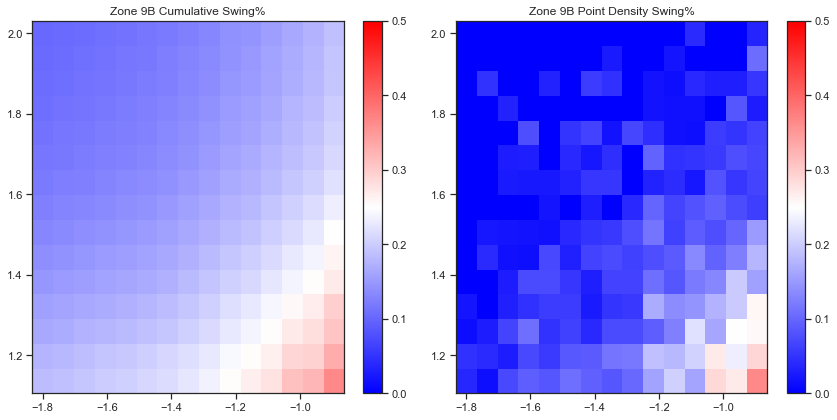

In [24]:
disp_9(pitch)

In [25]:
#update these cutoff numbers
cutoff_9 = (-1.2, 1.4)

filt1 = (pitch['obv_zone'] == '9b')
filt2 = (pitch['px'] > cutoff_9[0]) & (pitch['py'] < cutoff_9[1])
z_in_9 = pitch.loc[filt1 & filt2, 'swing']
z_out_9 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_9}\n")
print(f"Num Pitches in Ball Zone: {z_in_9.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_9.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_9.sum()}")
print(f"Num Takes : {z_in_9.count()-z_in_9.sum()}")
print(f"Swing%: {z_in_9.sum()/z_in_9.count()}")
print(f"Take%: {1 - z_in_9.sum()/z_in_9.count()}")

Coordinates: (-1.2, 1.4)

Num Pitches in Ball Zone: 6061
Num Pitches in Obv Zone: 19572

Non-Obv Ball Zones
Num Swings: 1227
Num Takes : 4834
Swing%: 0.20244184128031678
Take%: 0.7975581587196832


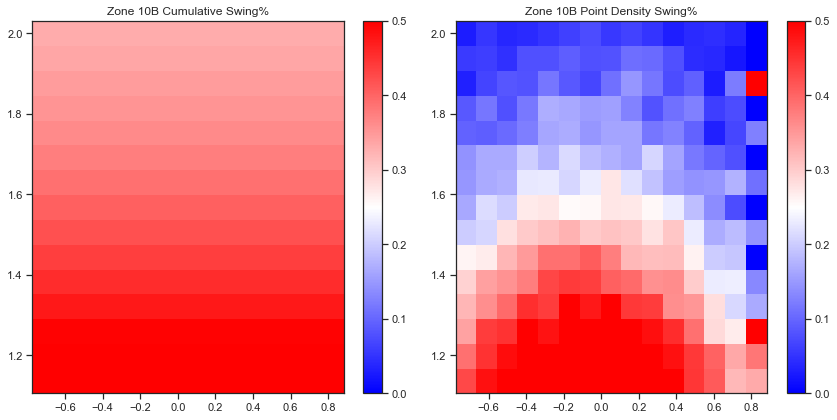

In [26]:
disp_10(pitch)

In [27]:
#update these cutoff numbers
cutoff_10 = (None, 1.5)

filt1 = (pitch['obv_zone'] == '10b')
filt2 = (pitch['py'] < cutoff_10[1])
z_in_10 = pitch.loc[filt1 & filt2, 'swing']
z_out_10 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_10}\n")
print(f"Num Pitches in Ball Zone: {z_in_10.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_10.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_10.sum()}")
print(f"Num Takes : {z_in_10.count()-z_in_10.sum()}")
print(f"Swing%: {z_in_10.sum()/z_in_10.count()}")
print(f"Take%: {1 - z_in_10.sum()/z_in_10.count()}")

Coordinates: (None, 1.5)

Num Pitches in Ball Zone: 55565
Num Pitches in Obv Zone: 40248

Non-Obv Ball Zones
Num Swings: 23518
Num Takes : 32047
Swing%: 0.42325204715198417
Take%: 0.5767479528480158


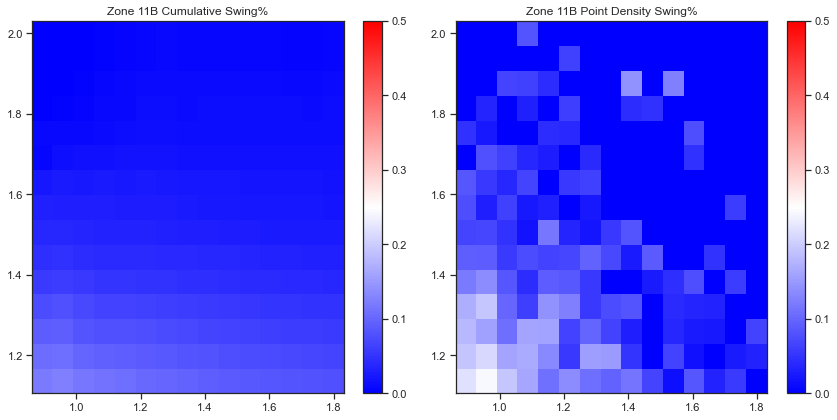

In [28]:
disp_11(pitch)

In [29]:
#update these cutoff numbers
cutoff_11 = (None, None)

filt1 = (pitch['obv_zone'] == '11b')
filt2 = (pitch['px'] < cutoff_11[0]) & (pitch['py'] < cutoff_11[1])
z_in_11 = pitch.loc[filt1 & filt2, 'swing']
z_out_11 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_11}\n")
print(f"Num Pitches in Ball Zone: {z_in_11.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_11.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_11.sum()}")
print(f"Num Takes : {z_in_11.count()-z_in_11.sum()}")
print(f"Swing%: {z_in_11.sum()/z_in_11.count()}")
print(f"Take%: {1 - z_in_11.sum()/z_in_11.count()}")

Coordinates: (None, None)

Num Pitches in Ball Zone: 0
Num Pitches in Obv Zone: 13987

Non-Obv Ball Zones
Num Swings: 0
Num Takes : 0
Swing%: nan
Take%: nan


<ipython-input-29-cd37503e5229>:16: RuntimeWarning: invalid value encountered in long_scalars
  print(f"Swing%: {z_in_11.sum()/z_in_11.count()}")
<ipython-input-29-cd37503e5229>:17: RuntimeWarning: invalid value encountered in long_scalars
  print(f"Take%: {1 - z_in_11.sum()/z_in_11.count()}")


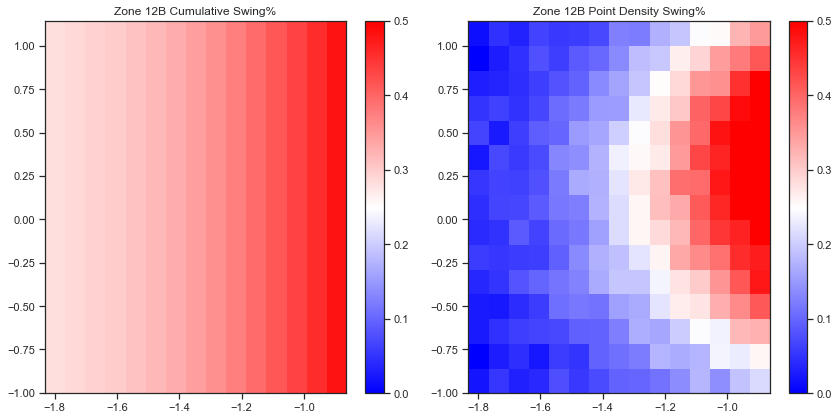

In [30]:
disp_12(pitch)

In [31]:
#update these cutoff numbers
cutoff_12 = (-1.5, None)

filt1 = (pitch['obv_zone'] == '12b')
filt2 = (pitch['px'] > cutoff_12[0])
z_in_12 = pitch.loc[filt1 & filt2, 'swing']
z_out_12 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_12}\n")
print(f"Num Pitches in Ball Zone: {z_in_12.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_12.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_12.sum()}")
print(f"Num Takes : {z_in_12.count()-z_in_12.sum()}")
print(f"Swing%: {z_in_12.sum()/z_in_12.count()}")
print(f"Take%: {1 - z_in_12.sum()/z_in_12.count()}")

Coordinates: (-1.5, None)

Num Pitches in Ball Zone: 126216
Num Pitches in Obv Zone: 31010

Non-Obv Ball Zones
Num Swings: 39878
Num Takes : 86338
Swing%: 0.3159504341763326
Take%: 0.6840495658236674


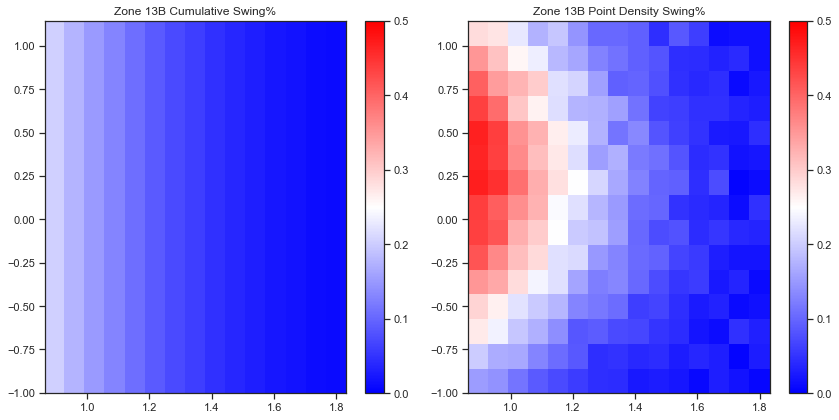

In [32]:
disp_13(pitch)

In [33]:
#update these cutoff numbers
cutoff_13 = (1.4, None)

filt1 = (pitch['obv_zone'] == '13b')
filt2 = (pitch['px'] < cutoff_13[0])
z_in_13 = pitch.loc[filt1 & filt2, 'swing']
z_out_13 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_13}\n")
print(f"Num Pitches in Ball Zone: {z_in_13.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_13.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_13.sum()}")
print(f"Num Takes : {z_in_13.count()-z_in_13.sum()}")
print(f"Swing%: {z_in_13.sum()/z_in_13.count()}")
print(f"Take%: {1 - z_in_13.sum()/z_in_13.count()}")

Coordinates: (1.4, None)

Num Pitches in Ball Zone: 114978
Num Pitches in Obv Zone: 38351

Non-Obv Ball Zones
Num Swings: 33452
Num Takes : 81526
Swing%: 0.29094261510897734
Take%: 0.7090573848910227


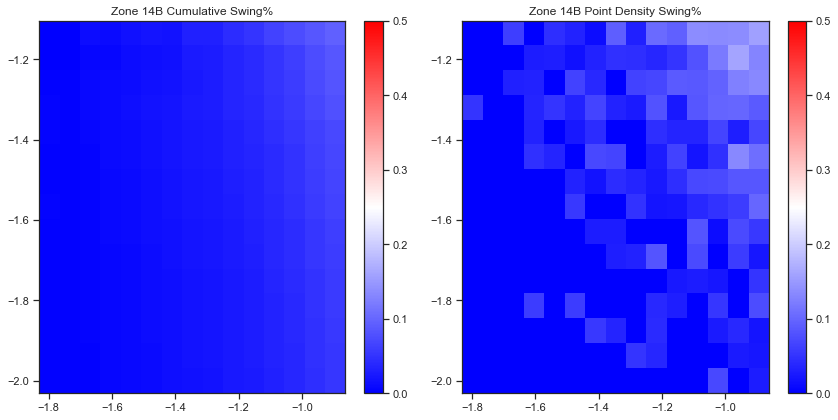

In [34]:
disp_14(pitch)

In [35]:
#update these cutoff numbers
cutoff_14 = (None, None)

filt1 = (pitch['obv_zone'] == '14b')
filt2 = (pitch['px'] > cutoff_14[0]) & (pitch['py'] > cutoff_14[1])
z_in_14 = pitch.loc[filt1 & filt2, 'swing']
z_out_14 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_14}\n")
print(f"Num Pitches in Ball Zone: {z_in_14.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_14.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_14.sum()}")
print(f"Num Takes : {z_in_14.count()-z_in_14.sum()}")
print(f"Swing%: {z_in_14.sum()/z_in_14.count()}")
print(f"Take%: {1 - z_in_14.sum()/z_in_14.count()}")

Coordinates: (None, None)

Num Pitches in Ball Zone: 0
Num Pitches in Obv Zone: 15399

Non-Obv Ball Zones
Num Swings: 0
Num Takes : 0
Swing%: nan
Take%: nan


<ipython-input-35-ccf1faa85464>:16: RuntimeWarning: invalid value encountered in long_scalars
  print(f"Swing%: {z_in_14.sum()/z_in_14.count()}")
<ipython-input-35-ccf1faa85464>:17: RuntimeWarning: invalid value encountered in long_scalars
  print(f"Take%: {1 - z_in_14.sum()/z_in_14.count()}")


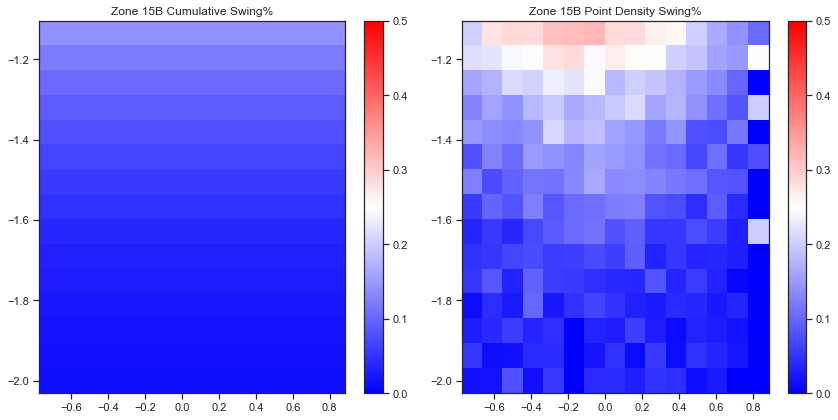

In [36]:
disp_15(pitch)

In [ ]:
#update these cutoff numbers
cutoff_15 = (None, -1.3)

filt1 = (pitch['obv_zone'] == '15b')
filt2 = (pitch['py'] > cutoff_15[1])
z_in_15 = pitch.loc[filt1 & filt2, 'swing']
z_out_15 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_15}\n")
print(f"Num Pitches in Ball Zone: {z_in_15.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_15.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_15.sum()}")
print(f"Num Takes : {z_in_15.count()-z_in_15.sum()}")
print(f"Swing%: {z_in_15.sum()/z_in_15.count()}")
print(f"Take%: {1 - z_in_15.sum()/z_in_15.count()}")

Coordinates: (None, -1.3)

Num Pitches in Ball Zone: 30801
Num Pitches in Obv Zone: 41555

Non-Obv Ball Zones
Num Swings: 7556
Num Takes : 23245
Swing%: 0.24531671049641246
Take%: 0.7546832895035875


In [ ]:
disp_16(pitch)

In [ ]:
#update these cutoff numbers
cutoff_16 = (None, None)

filt1 = (pitch['obv_zone'] == '16b')
filt2 = (pitch['px'] < cutoff_16[0]) & (pitch['py'] > cutoff_16[1])
z_in_16 = pitch.loc[filt1 & filt2, 'swing']
z_out_16 = pitch.loc[filt1 & ~filt2, 'swing']

print(f"Coordinates: {cutoff_16}\n")
print(f"Num Pitches in Ball Zone: {z_in_16.shape[0]}")
print(f"Num Pitches in Obv Zone: {z_out_16.shape[0]}\n")
    
print("Non-Obv Ball Zones")
print(f"Num Swings: {z_in_16.sum()}")
print(f"Num Takes : {z_in_16.count()-z_in_16.sum()}")
print(f"Swing%: {z_in_16.sum()/z_in_16.count()}")
print(f"Take%: {1 - z_in_16.sum()/z_in_16.count()}")

In [ ]:
#add widgets to cutoffs?